# Bayesian Optimization

In [1]:
import os

import sys
sys.path.append("..")

from src.scan import scan, scan_bayesian_optimization
from src.scan.decorators import response_measurements, add_noise
from src.scan.utils import plot_meters_data, plot_motors_data, clear_output
from src.elegant import eleget, eleput
from src.core import config as cfg

In [2]:
MOTOR_RANGE = [-1e-3, 1e-3]

MOTORS = [  
    ["MG-LA1.CL1.HKICK", MOTOR_RANGE],
    ["MG-LA1.CL2.HKICK", MOTOR_RANGE],
    ["MG-LA2.CL3.HKICK", MOTOR_RANGE],
    ["MG-LA3.CL4.HKICK", MOTOR_RANGE],
    ["MG-LA4.CL5.HKICK", MOTOR_RANGE],
    ["MG-LA5.CL6.HKICK", MOTOR_RANGE],      
]

METERS =[
    "BI-LA1.PK3.Cx", 
    "BI-LA2.PK4.Cx", 
    "BI-LA3.PK5.Cx", 
    "BI-LA4.PK6.Cx",
]

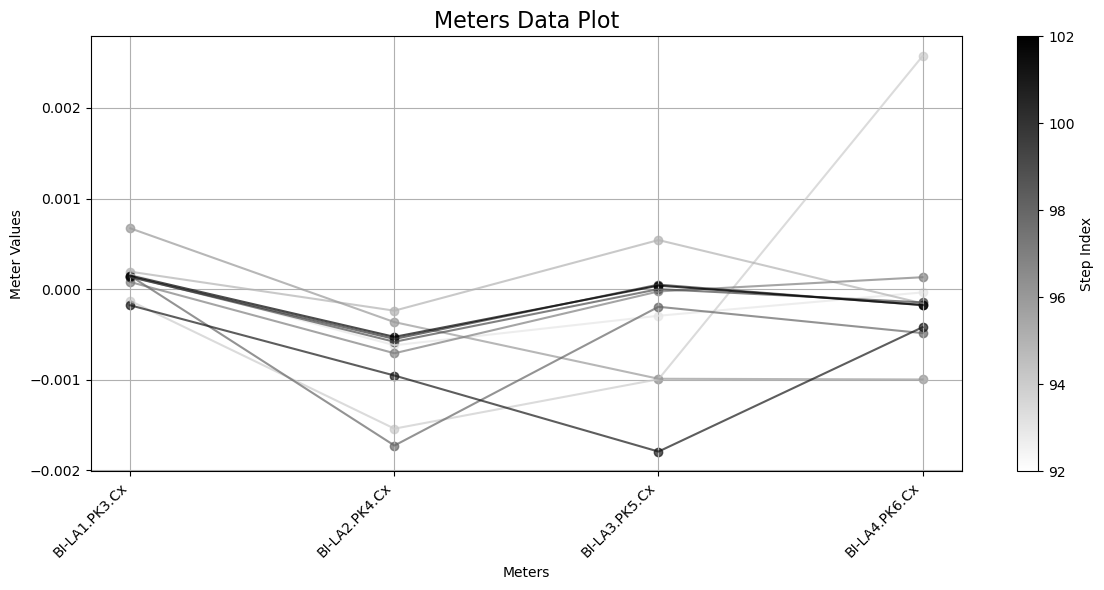

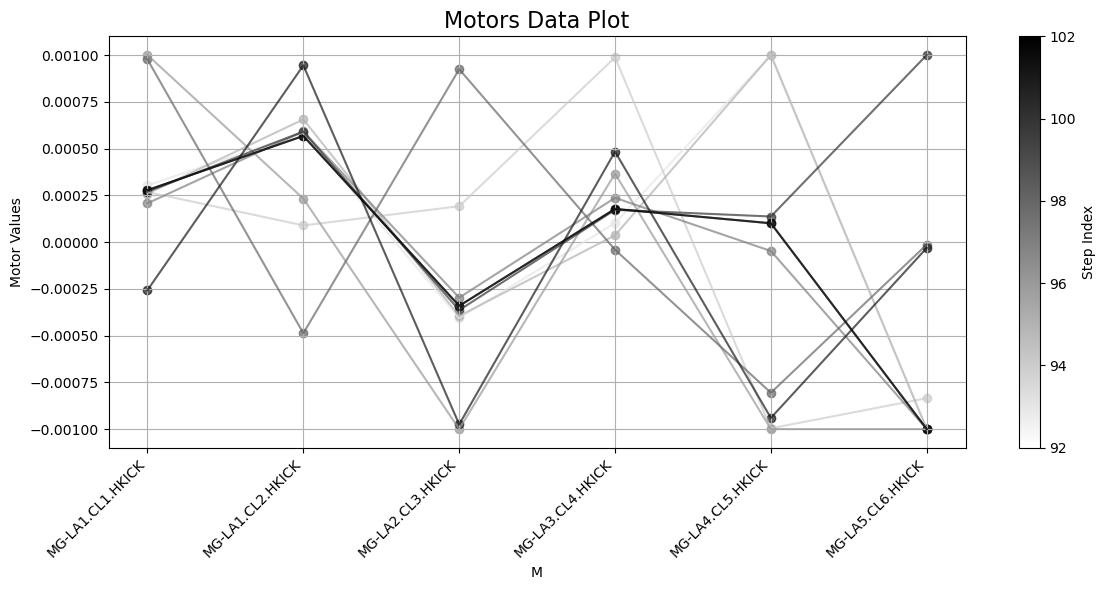

Set original motor value:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
data_scan = scan_bayesian_optimization(
    meters=METERS, 
    motors=MOTORS, 
    get_func=add_noise(0.20)(eleget), 
    put_func=add_noise(0.05)(eleput), 
    sample_size=10,
    verify_motor=True,
    max_retries=3,
    delay=0.1,
    tolerance=0.01,
    save=False,
    dirname="",
    callback=[clear_output, plot_meters_data, plot_motors_data], 
    save_original_motor_values=True,
)

In [5]:
data_scan

{'data': {'MG-LA1.CL1.HKICK': {0.0002777054161300313: {'BI-LA1.PK3.Cx': 0.00015038701523415368,
    'BI-LA2.PK4.Cx': -0.0005259522516209995,
    'BI-LA3.PK5.Cx': 3.953227578946929e-05,
    'BI-LA4.PK6.Cx': -0.00017365318164228423}},
  'MG-LA1.CL2.HKICK': {0.0005673118005304662: {'BI-LA1.PK3.Cx': 0.00015038701523415368,
    'BI-LA2.PK4.Cx': -0.0005259522516209995,
    'BI-LA3.PK5.Cx': 3.953227578946929e-05,
    'BI-LA4.PK6.Cx': -0.00017365318164228423}},
  'MG-LA2.CL3.HKICK': {-0.0003412095571142166: {'BI-LA1.PK3.Cx': 0.00015038701523415368,
    'BI-LA2.PK4.Cx': -0.0005259522516209995,
    'BI-LA3.PK5.Cx': 3.953227578946929e-05,
    'BI-LA4.PK6.Cx': -0.00017365318164228423}},
  'MG-LA3.CL4.HKICK': {0.00017713190813644177: {'BI-LA1.PK3.Cx': 0.00015038701523415368,
    'BI-LA2.PK4.Cx': -0.0005259522516209995,
    'BI-LA3.PK5.Cx': 3.953227578946929e-05,
    'BI-LA4.PK6.Cx': -0.00017365318164228423}},
  'MG-LA4.CL5.HKICK': {0.00010030151639702292: {'BI-LA1.PK3.Cx': 0.00015038701523415368,
 